In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter
%matplotlib inline

In [2]:
df= pd.read_csv('E:\\Marwan Gamal\\Projects ML\\Income Evaluation\\income_evaluation.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
assert pd.notnull(df).all().all()

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [8]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))


There are 9 categorical variables



In [9]:
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


# Handeling missing vallues in categoricla data

In [10]:
def null(categorical):
    num=df[categorical].nunique()
    cat=df[categorical].unique()
    count=df[categorical].value_counts()
    print('Number of {} unique values is:'.format(categorical),num)
    print('\n{} the unique values is:\n'.format(categorical),cat)
    print('\n{} values:\n'.format(categorical),count)
null('workclass')
print("*"*120)
null('education')
print("*"*120)
null('marital_status')
print("*"*120)
null('occupation')
print("*"*120)
null('relationship')
print("*"*120)
null('race')
print("*"*120)
null('sex')
print("*"*120)
null('native_country')
print("*"*120)
null('income')
print("*"*120)

Number of workclass unique values is: 9

workclass the unique values is:
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

workclass values:
  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
************************************************************************************************************************
Number of education unique values is: 16

education the unique values is:
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

education values:
  HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc 

### So, We find the missing values '?' in the categorical in 3 feature:
   - **workclass: 1836 '?'**
   - **occupation: 1843 '?'**
   - **native_country: 583 '?'**


### Note : python can't detect this '?' mising value because it does not consider ? as missing values.


## What do we do then?
- **We will do replace these '?' with NaN values to Python can detect these missing values.**

In [11]:
df['workclass'].replace(' ?', np.NaN, inplace=True)
df['occupation'].replace(' ?', np.NaN, inplace=True)
df['native_country'].replace(' ?', np.NaN, inplace=True)

In [12]:
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native_country'].fillna(df['native_country'].mode()[0], inplace=True)    

In [13]:
# check the null values 
df[categorical].isna().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

# Visualizeation with Categorical data

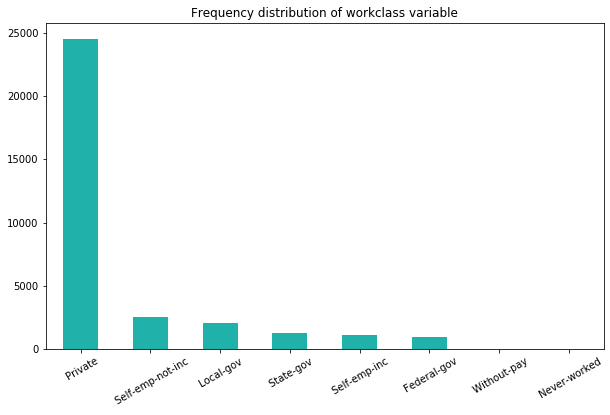

In [14]:
f, ax = plt.subplots(figsize=(10, 6))
ax = df.workclass.value_counts().plot(kind="bar", color="lightseagreen")
ax.set_title("Frequency distribution of workclass variable")
ax.set_xticklabels(df.workclass.value_counts().index, rotation=30)
plt.show()

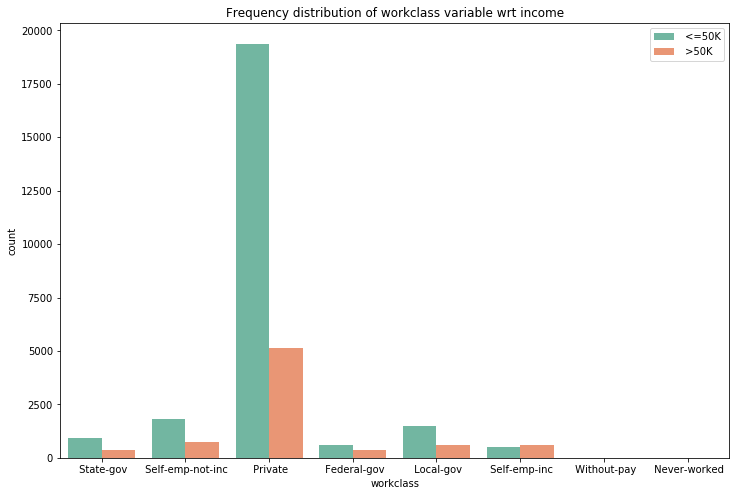

In [15]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="workclass", hue="income", data=df, palette="Set2")
ax.set_title("Frequency distribution of workclass variable wrt income")
ax.legend(loc='upper right')
plt.show()

### The income private work is more than 50k  

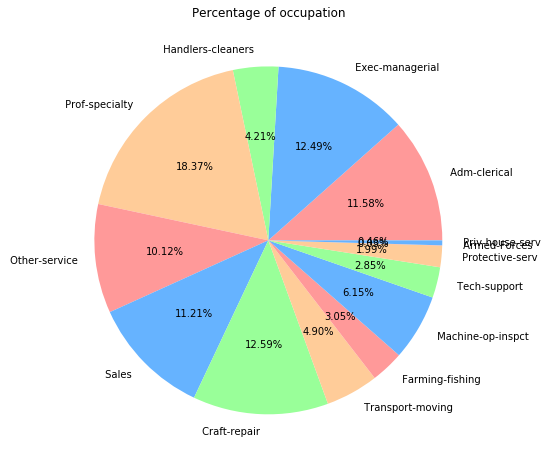

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
count = Counter(df['occupation'])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%',colors=colors)
ax.set_title('Percentage of occupation')
plt.show()

### The Prof-speciatly is high Percentage 18.37%

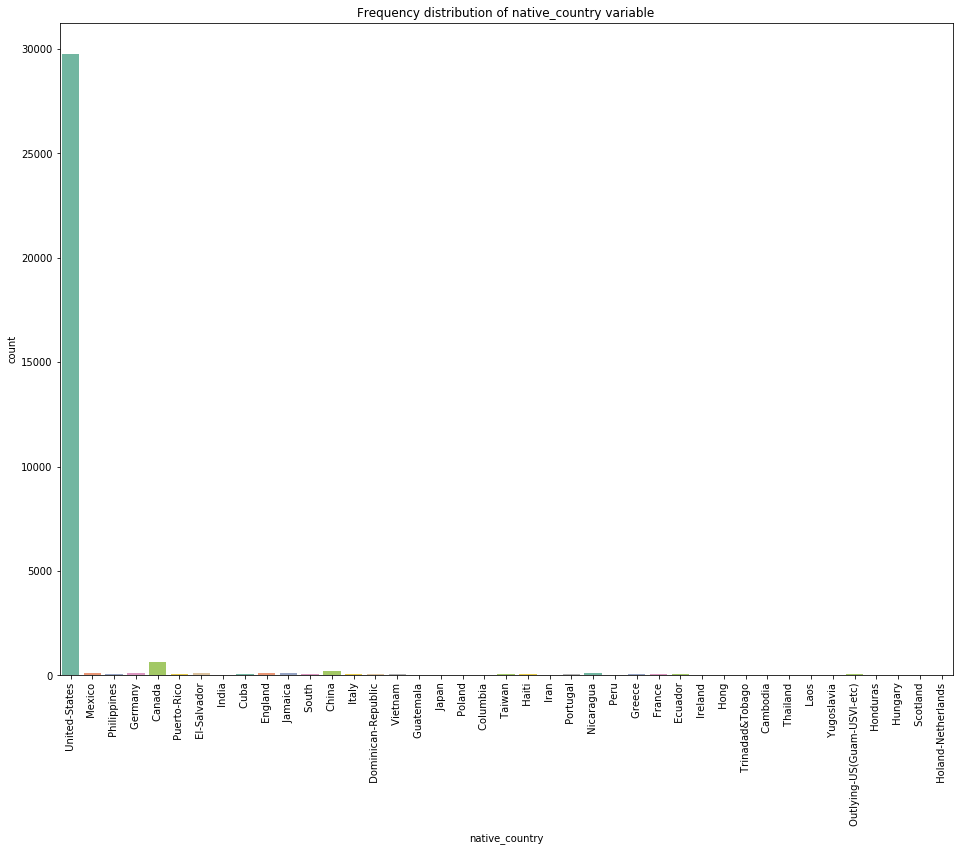

In [17]:
f, ax = plt.subplots(figsize=(16, 12))
ax = sns.countplot(x="native_country", data=df, palette="Set2")
ax.set_title("Frequency distribution of native_country variable")
ax.set_xticklabels(df.native_country.value_counts().index, rotation=90)
plt.show()

### USA is more Native Country

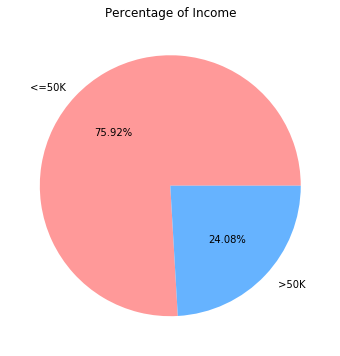

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
count = Counter(df['income'])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%',colors=colors)
ax.set_title('Percentage of Income')
plt.show()

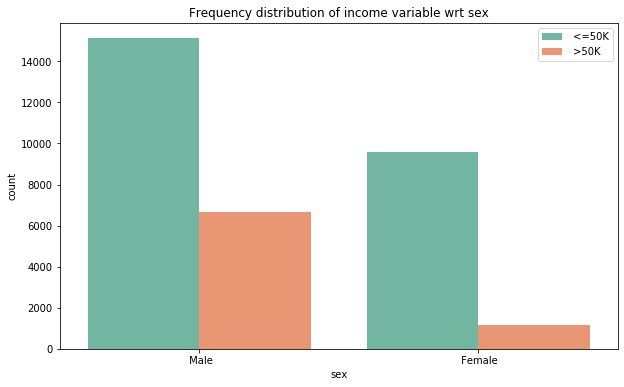

In [19]:
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x="sex", hue="income", data=df, palette="Set2")
ax.set_title("Frequency distribution of income variable wrt sex")
ax.legend(loc='upper right')
plt.show()

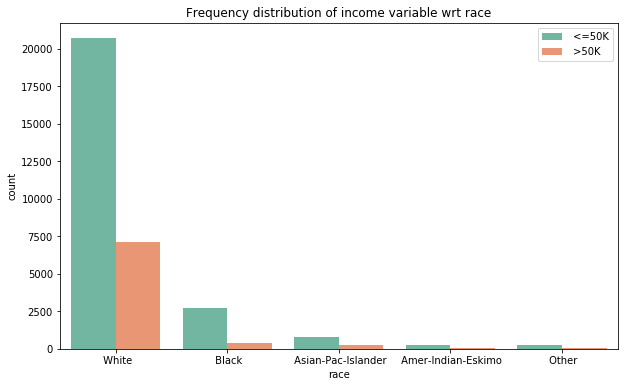

In [20]:
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x="race", hue="income", data=df, palette="Set2")
ax.set_title("Frequency distribution of income variable wrt race")
ax.legend(loc='upper right')
plt.show()

### white pepole is highst income

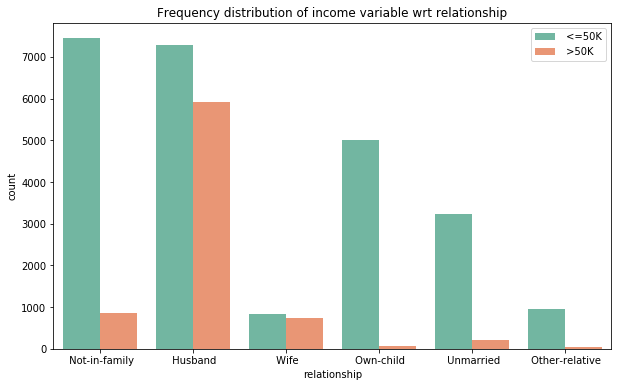

In [21]:
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x="relationship", hue="income", data=df, palette="Set2")
ax.set_title("Frequency distribution of income variable wrt relationship")
ax.legend(loc='upper right')
plt.show()

# Visualizeation with numrical data

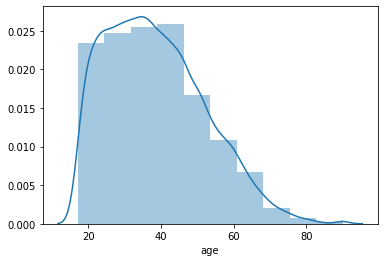

In [22]:
sns.distplot(df['age'],bins=10);

### 'age' is positively skewed

In [23]:
young_ages=df[(df['age']>=17)&(df['age']<40)]
middle_ages=df[(df['age']>=40)&(df['age']<65)]
elderly_ages=df[(df['age']>60)]
print('Young Ages is:',len(young_ages))
print('Middle Ages is:',len(middle_ages))
print('Elderly Ages is:',len(elderly_ages))

Young Ages is: 18324
Middle Ages is: 12901
Elderly Ages is: 2332


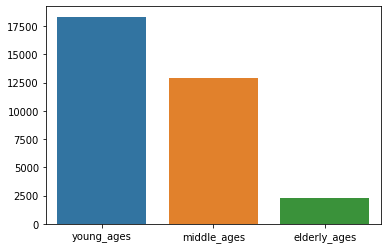

In [24]:
sns.barplot(x=['young_ages','middle_ages','elderly_ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)]);

### It is obvious that young is more range

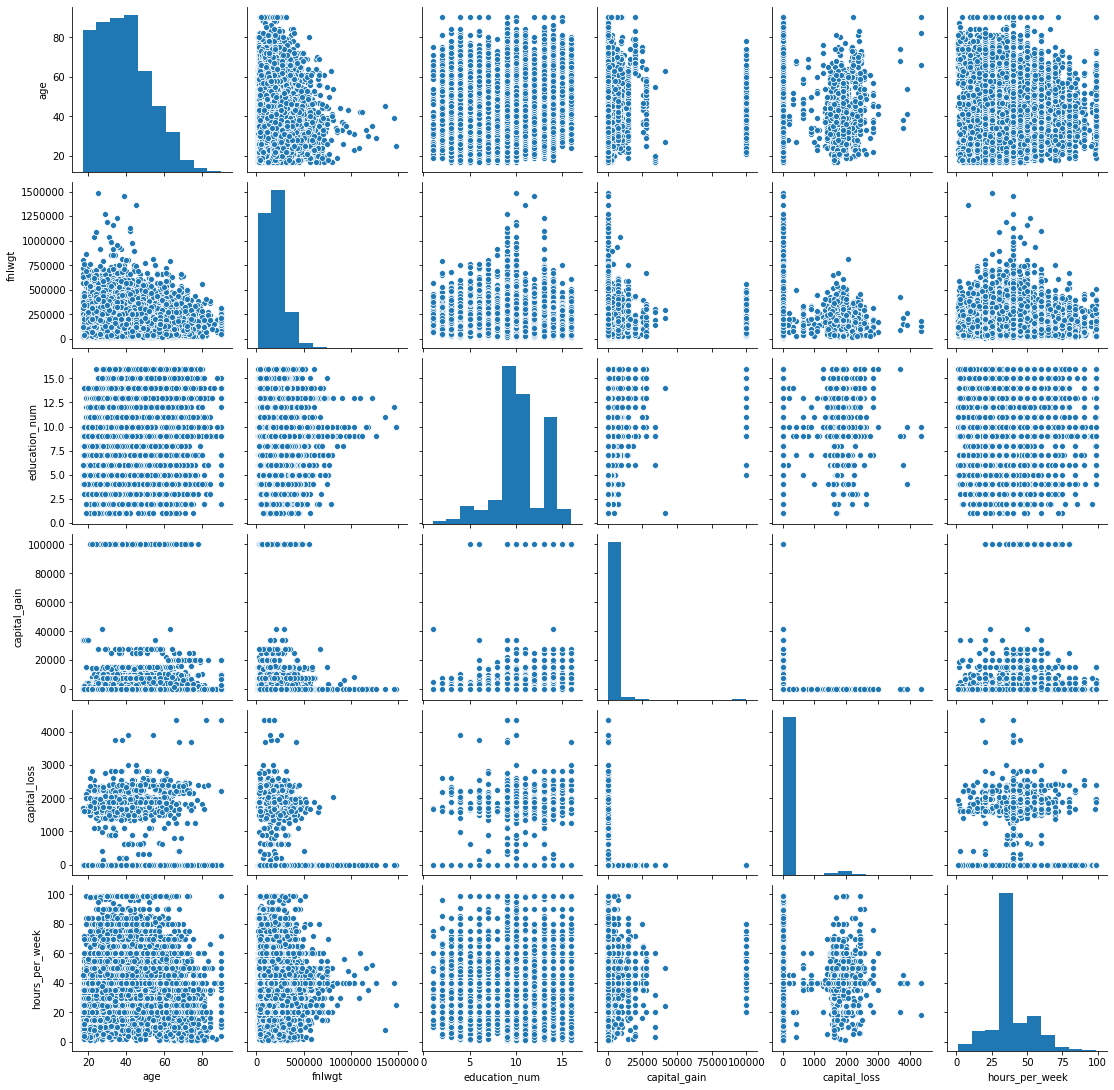

In [25]:
sns.pairplot(df)
plt.show()

### We can see that 'fnlwgt' are positively skewed,The variable 'education_num' is negatively skewed while 'hours_per_week' is normally distributed.

# Spelting data

In [26]:
df = pd.get_dummies(df, columns=['workclass'])
df = pd.get_dummies(df, columns=['education'])
df = pd.get_dummies(df, columns=['occupation'])
df = pd.get_dummies(df, columns=['relationship'])
df = pd.get_dummies(df, columns=['race'])
df = pd.get_dummies(df, columns=['sex'])
df = pd.get_dummies(df, columns=['native_country'])
df = pd.get_dummies(df, columns=['marital_status'])

In [27]:
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,38,215646,9,0,0,40,<=50K,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,53,234721,7,0,0,40,<=50K,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,28,338409,13,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
x=df.drop('income',axis=1)
y=df['income']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [31]:
scaler =preprocessing.RobustScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Machine Learning Models

In [67]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

lr_pred=lr.predict(x_test)
accuracy_score(y_test,lr_pred)*100

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


84.67601596888116

In [68]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      7407
        >50K       0.73      0.58      0.65      2362

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.77      9769
weighted avg       0.84      0.85      0.84      9769



(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x27d62667a88>)

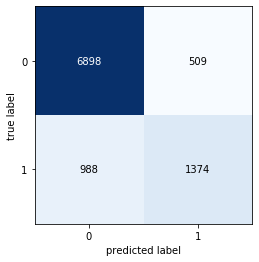

In [34]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(confusion_matrix(y_test,lr_pred))

# KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)*100

85.10594738458389

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.91      0.90      7407
        >50K       0.71      0.66      0.68      2362

    accuracy                           0.85      9769
   macro avg       0.80      0.79      0.79      9769
weighted avg       0.85      0.85      0.85      9769



(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x27d63da8a08>)

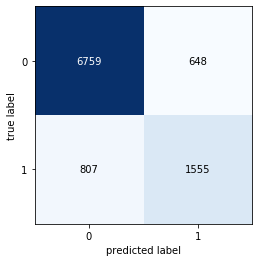

In [49]:
plot_confusion_matrix(confusion_matrix(y_test,y_pred))

# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100,random_state =0)
model_rf.fit(x_train, y_train)

prediction_test = model_rf.predict(x_test)
accuracy_score(y_test, prediction_test)*100

85.19807554509161

In [52]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7407
        >50K       0.73      0.62      0.67      2362

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769



(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x27d63a1f908>)

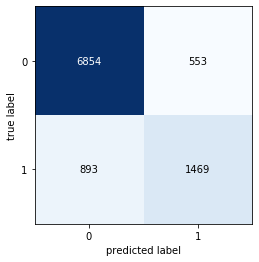

In [39]:
plot_confusion_matrix(confusion_matrix(y_test,prediction_test))

In [64]:
importances = pd.Series(model_rf.feature_importances_, index=x.columns.values).sort_values(ascending=False)

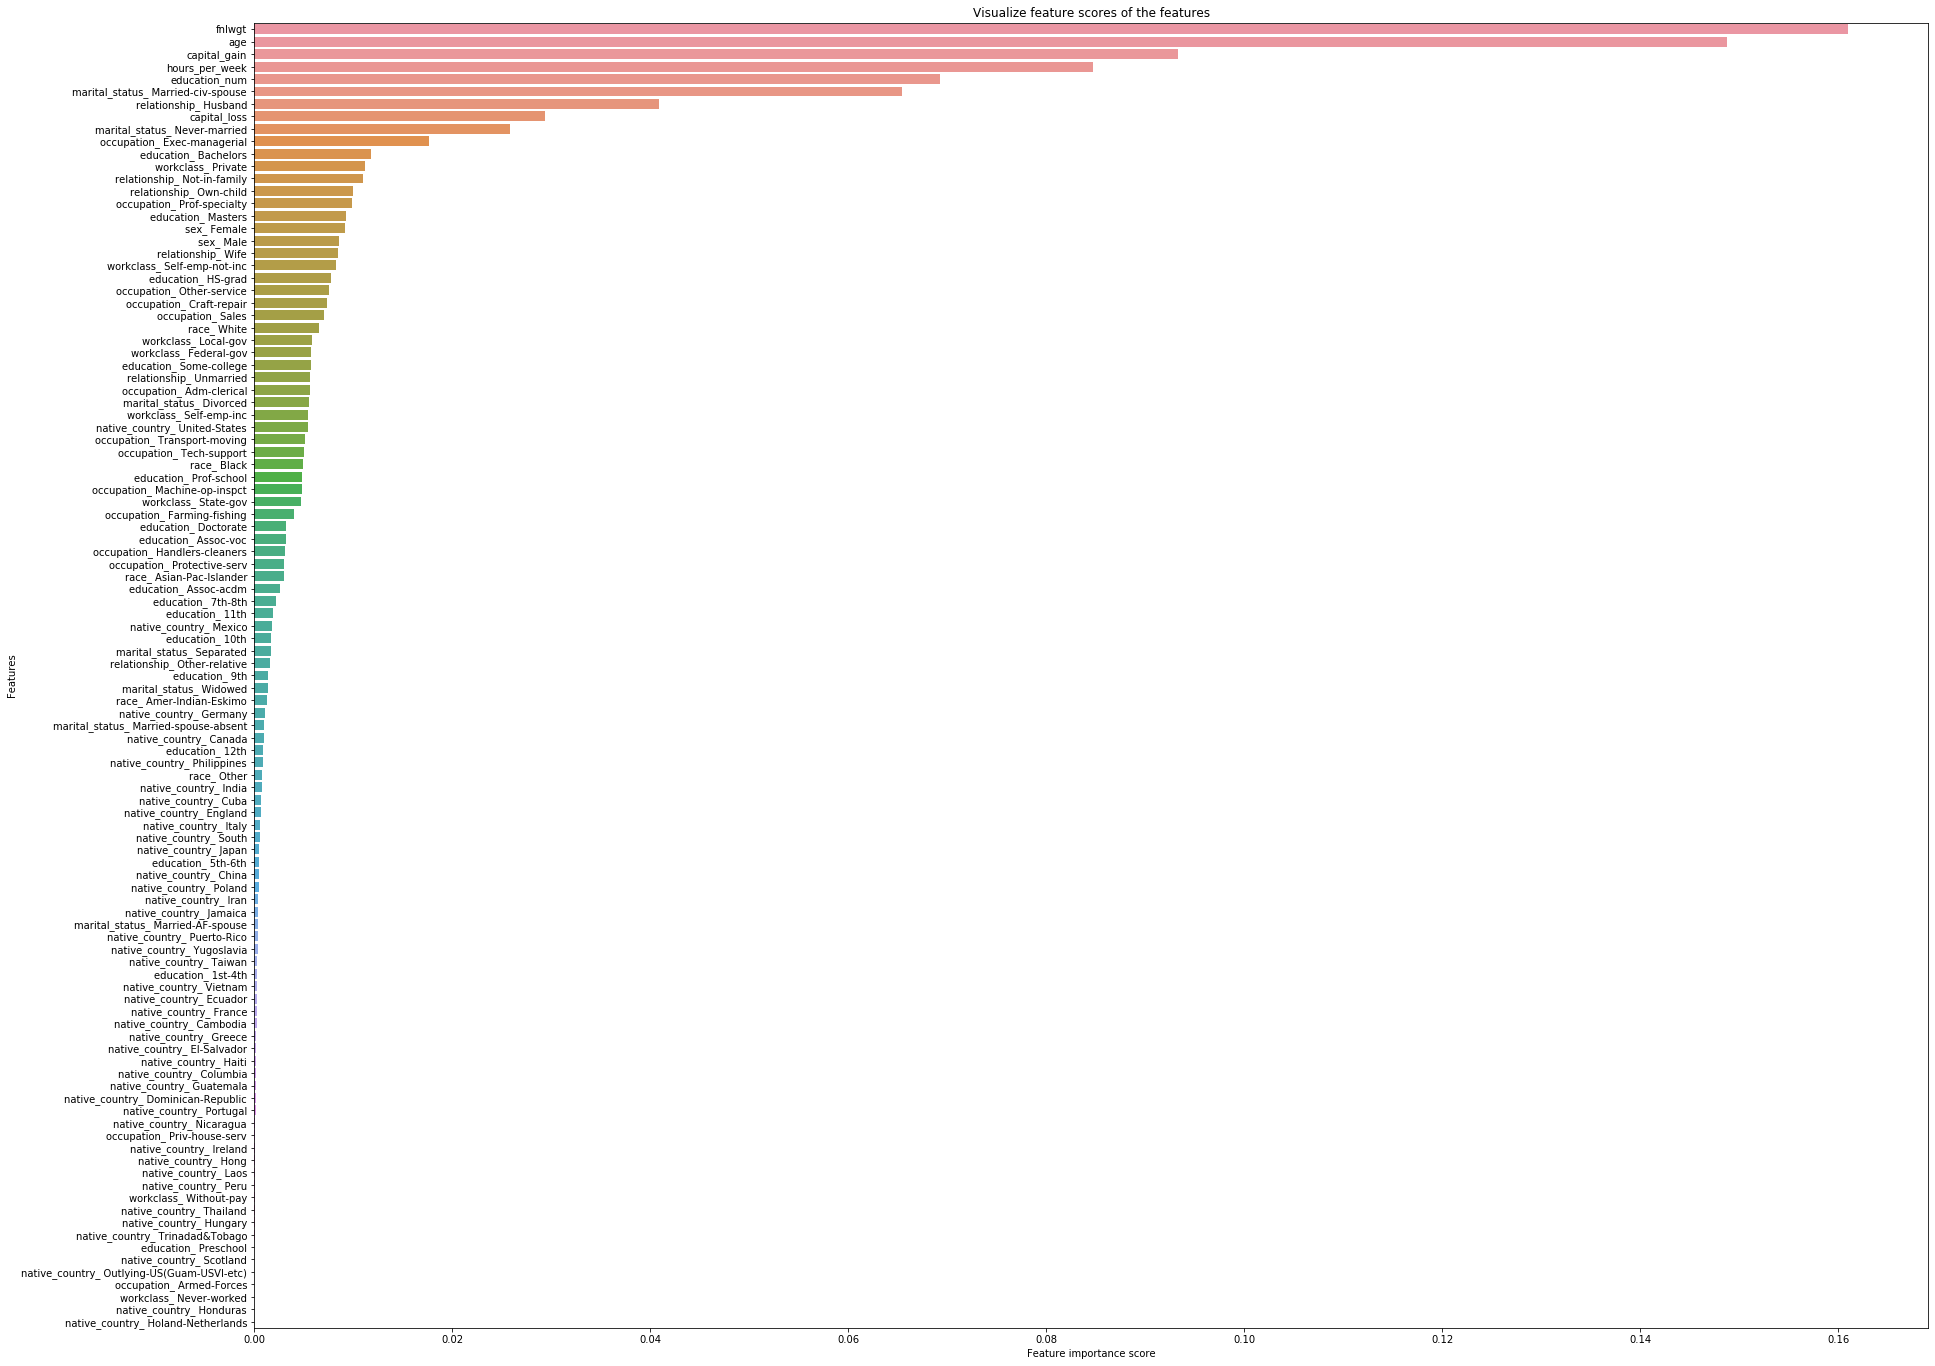

In [65]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=importances, y=importances.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(importances.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

### Most important feature is 'fnlwgt' and least important feature is 'native_country_Holanda-Netherlands'.